In [8]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.metoc import read_miniwavebuoy,read_miniwavebuoy_spec,read_miniwavebuoy_Dmeanspec,\
                         read_metbuoy,read_mwbn
from wgpack.physo import compute_Dmbar,compute_Ta

In [9]:
# read-in MWB waves
data_dir = "/Volumes/cordc-data/PROJECTS/WAVEGLIDER"
vnam = "magnus"
datedir = "20210219_20210402"
LOCALdir = os.path.join(data_dir,vnam,'archive',datedir,'nrt','mwb')

# List local file names for Miniature Wave Buoy (mwb) data
fnames_local=[]
for root, dirs, files in os.walk(LOCALdir):
    for filename in files:
        if not filename[0] == '.':
            fnames_local.append(filename)

path_local = os.path.join(LOCALdir,fnames_local[0])
# Read-in mwb waves
mwb = read_mwbn(path_local)
mwbdf    = read_miniwavebuoy(path_local) # bulk parameters
mwbspec  = read_miniwavebuoy_spec(path_local) # spectral data
mwbDmean = read_miniwavebuoy_Dmeanspec(path_local) # mean wave direction as a function of frequency
for f in fnames_local[1:]:
    path_local = os.path.join(LOCALdir,f)
    mwbdf    = pd.concat([mwbdf, read_miniwavebuoy(path_local)])
    mwbspec  = pd.concat([mwbspec, read_miniwavebuoy_spec(path_local)])
    mwbDmean = pd.concat([mwbDmean, read_miniwavebuoy_Dmeanspec(path_local)])
# sort by date
mwbdf.sort_index(inplace=True)
mwbspec.sort_index(inplace=True)
mwbDmean.sort_index(inplace=True)

# time from time-bounds
t_mwb_unix = np.mean(mwb['time_bounds'],axis=1)
tspec_mwb_unix = np.mean(mwb['time_nofilt_fs2_bounds'],axis=1)
t_mwb = pd.DatetimeIndex(t_mwb_unix.astype('datetime64[s]'))
# mwbspec.index

# compute energy-weighted period
Ta_mwb = compute_Ta(mwb['frequency_nofilt_fs2'],mwb['energy_nofilt_fs2'])
mwbdf['Ta'] = Ta_mwb

# compute energy-weighted direction
# compute_Dmbar(f,Dm,E)
Dm_mwb = compute_Dmbar(mwb['frequency_nofilt_fs2'],mwb['mean_dir_nofilt_fs2'],mwb['energy_nofilt_fs2'])
mwbdf['Dm'] = Dm_mwb
mwbdf

,Hs,Tp,Dp,cog,lat,lon,Ta,Dm
Date,,,,,,,,
2021-02-19 19:41:26,0.59,14.2,282,350.0,32.881371,-117.274872,7.692076,269.670609
2021-02-19 19:51:03,0.69,13.1,277,345.0,32.884720,-117.275032,8.480984,270.090843
2021-02-19 20:00:48,0.67,11.1,273,268.0,32.886398,-117.275208,7.363155,264.672607
2021-02-19 20:11:19,0.69,11.6,275,275.0,32.886902,-117.279388,8.282054,273.962547
2021-02-19 20:22:25,0.82,13.8,275,220.0,32.887131,-117.281723,8.921818,267.685112
...,...,...,...,...,...,...,...,...
2021-04-02 15:03:52,0.59,16.5,248,289.0,32.870171,-117.275772,6.013428,256.433449
2021-04-02 15:13:43,0.62,12.8,234,79.0,32.872589,-117.275337,5.616850,243.999664
2021-04-02 15:23:45,0.58,14.6,245,199.0,32.870926,-117.273376,5.734369,254.517578


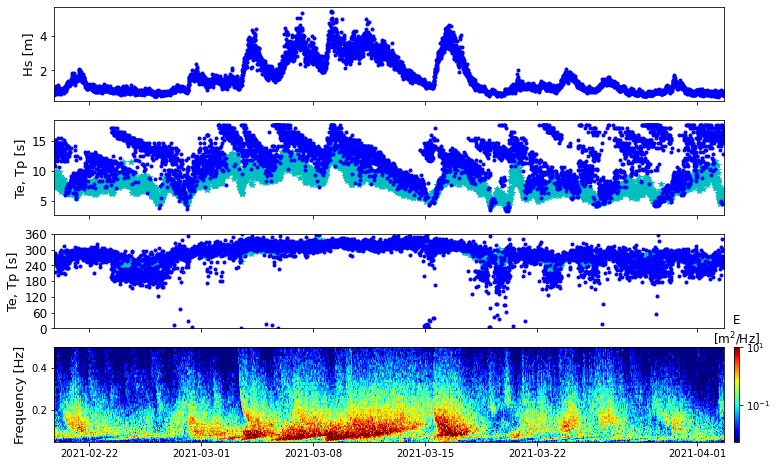

In [10]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

# configure plot parameters
# references: https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html
fntsz = 13
labsz = 12
Emin,Emax  = 5E-3, 10
fmin, fmax = 1/22, 1/2
# xmin,xmax = ta, tb
# iixL = np.where(np.logical_and(tt_bar>xmin,tt_bar<xmax))

# fmin, fmax = 1/22, 1/2.5
widths = [3]
heights = [1,1,1,1]
ncols,nrows = 1,4
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, f8_axs = plt.subplots(ncols=ncols, nrows=nrows,
                            sharex=True,
                            sharey=False,
                            gridspec_kw=gs_kw,
                            figsize=(12, 8))

gs = f8_axs[1].get_gridspec()
ax1 = f8_axs[0]
ax2 = f8_axs[1]
ax3 = f8_axs[2]
ax4 = f8_axs[3]



# ----------------------------------------------------------------
# Hs
ax1.plot(mwbdf['Hs'], '.b')
ax1.set_ylabel('Hs [m]', fontsize=fntsz)
ax1.tick_params(labelsize=labsz)
plt.setp(ax1.get_xticklabels(), visible=False)

# ----------------------------------------------------------------
# Wave Period
ax2.plot(mwbdf['Ta'], '*c',label='$T_e$ WG')
ax2.plot(mwbdf['Tp'], '.b',label='$T_p$ WG')
ax2.set_ylabel('Te, Tp [s]', fontsize=fntsz)
ax2.tick_params(labelsize=labsz)
plt.setp(ax2.get_xticklabels(), visible=False)

# ----------------------------------------------------------------
# Wave Direction
ax3.plot(mwbdf['Dm'], '*c',label='$T_e$ WG')
ax3.plot(mwbdf['Dp'], '.b',label='$T_p$ WG')
ax3.set_ylabel('Te, Tp [s]', fontsize=fntsz)
ax3.set_ylim(0, 360)
ax3.set_yticks(np.arange(0, 361, step=60))
ax3.tick_params(labelsize=labsz)
plt.setp(ax3.get_xticklabels(), visible=False)


# ----------------------------------------------------------------
# spectrogram
x,y = np.meshgrid(mwbspec.index,mwbspec.columns)
c = ax4.pcolormesh(x,y,mwbspec.values.transpose(),
         norm=LogNorm(vmin=Emin, vmax=Emax),cmap = 'jet',shading='auto')
title_str1 = 'Wave Glider $E(f,t)$'
# Set y labels
ax4.set_ylabel('Frequency [Hz]', fontsize=fntsz)

# ----------------------------------------------------------------
# set y-axis limits
ax4.set_ylim(fmin, fmax)
 
# ----------------------------------------------------------------
# add a colorobar
gs = gridspec.GridSpec(ncols=ncols+1, nrows=nrows,right=0.97,figure=fig) 
axc = fig.add_subplot(gs[-1, -1])
axc.set_visible(False)
cbar = fig.colorbar(c, ax=axc,orientation='vertical')
# Add label on top of colorbar.
cbar.ax.set_xlabel("E\n[m$^2$/Hz]",fontsize=labsz)
cbar.ax.xaxis.set_label_position('top')
# cbar.set_ticks(np.linspace(0, 360,7))
# ----------------------------------------------------------------



